In [1]:
from mimic.utilities import *

from mimic.model_infer.infer_CRM_bayes import *
from mimic.model_infer import *
from mimic.model_simulate import *
from mimic.model_simulate.sim_gLV import * 


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pytensor.tensor as at
import pickle
import cloudpickle

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
set_all_seeds(1234)

num_species = 2
num_resources = 2
times = np.arange(0, 10, 0.1)

# species timescales
tau = np.random.uniform(0.1, 1.0, num_species)

# resource quality
w = np.random.uniform(0.1, 1.0, num_resources)

# relative resource preferences
c = np.random.uniform(0.1, 1.0, (num_species, num_resources))

# mortality rates
m = np.random.uniform(0.1, 1.0, num_species)

# resource timescales
r = np.random.uniform(0.1, 1.0, num_resources)

# resource carrying capacities
K = np.random.uniform(1.0, 10.0, num_resources)

# write the mu, M, epsilon, and pert_fn to a dictionary and pickle
params = {'num_species': num_species, 'num_resources': num_resources, 'tau': tau, 'w': w, 'c': c, 'm': m, 'r': r, 'K': K}
pd.to_pickle(params, 'params-s5.pkl')


In [ ]:
from mimic.model_simulate.sim_CRM import sim_CRM

# initial conditions
init_species = 10 * np.ones(num_species+num_resources)

# instantiate simulator
simulator = sim_CRM(num_species=num_species,
                    num_resources=num_resources)

simulator.set_parameters(num_species = params['num_species'],
                         num_resources = params['num_resources'],
                         tau = params['tau'],
                         w = params['w'],
                         c = params['c'],
                         m = params['m'],
                         r = params['r'],
                         K = params['K'])

simulator.print_parameters()

yobs, sobs = simulator.simulate(times, init_species)
 
# plot species simulation
plot_gLV(yobs, times)

# plot resources simulation
plot_gLV(sobs, times)


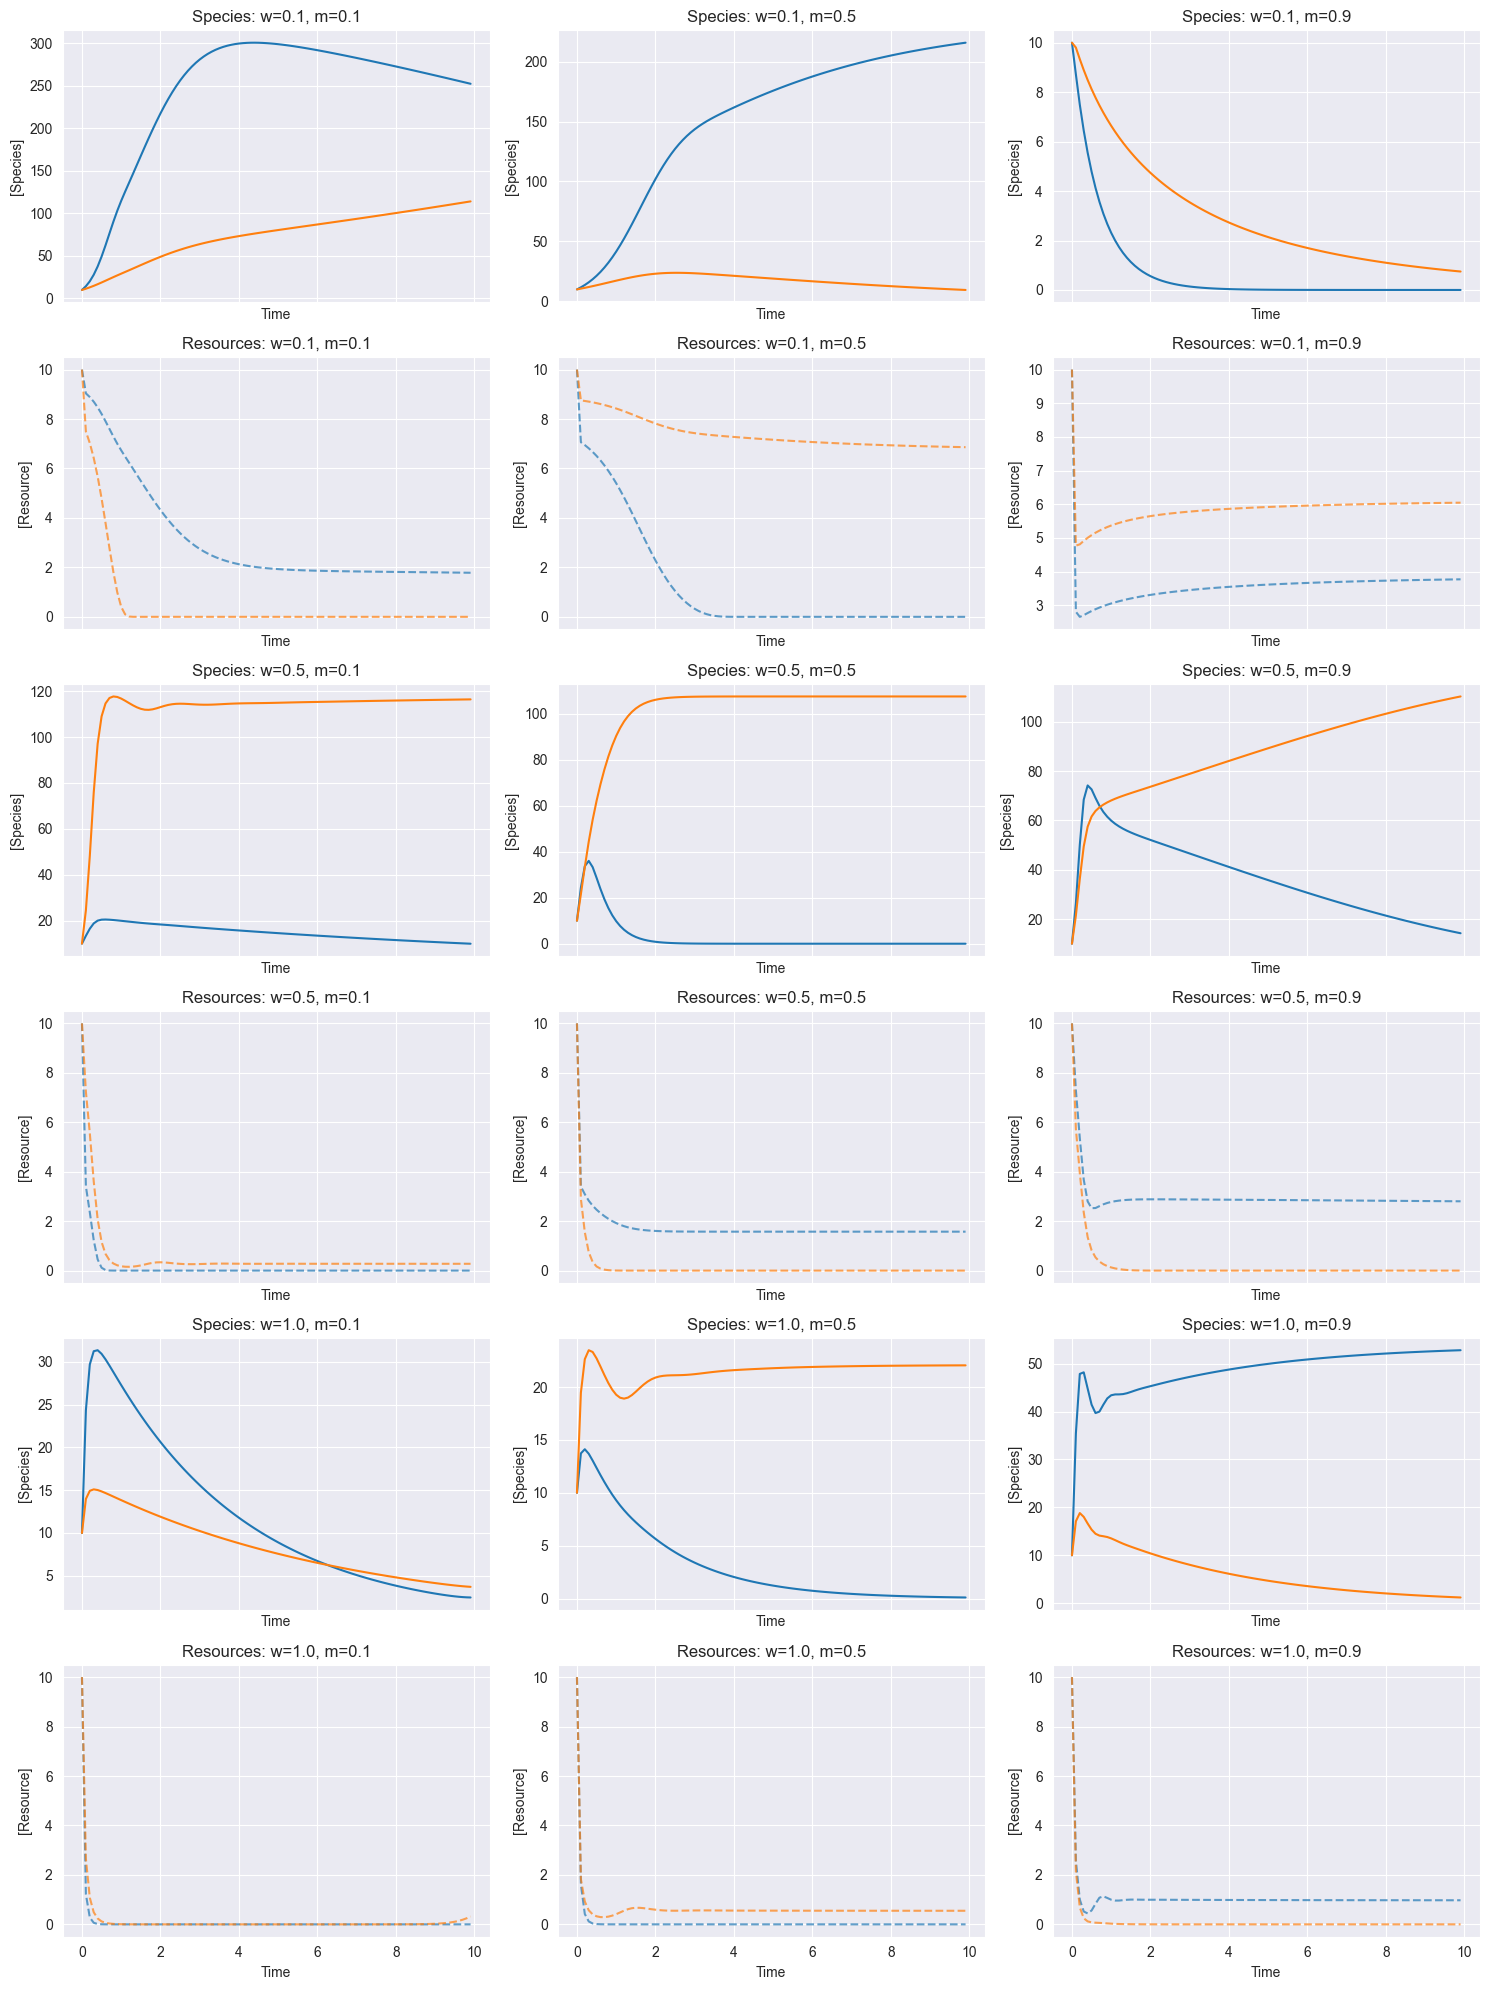

In [8]:
from mimic.model_simulate.sim_CRM import sim_CRM

set_all_seeds(1234)


# Simulation parameters
num_species = 2
num_resources = 2
times = np.arange(0, 10, 0.1)

# Initial conditions
init_species = 10 * np.ones(num_species + num_resources)


w_values = [0.1, 0.5, 1.0]
m_values = [0.1, 0.5, 0.9]



# Plotting: 2 rows per parameter combination
fig, axes = plt.subplots(2 * len(w_values), len(m_values), figsize=(15, 20), sharex=True)

for i, w in enumerate(w_values):
    for j, m in enumerate(m_values):
        # Set up other parameters with new tau and w
        w_param = np.array([w] * num_species)
        m_param = np.array([m] * num_resources)
        tau = np.random.uniform(0.1, 1.0, num_species)
        #w = np.random.uniform(0.1, 1.0, num_resources)
        c = np.random.uniform(0.1, 1.0, (num_species, num_resources))
        #m = np.random.uniform(0.1, 1.0, num_species)
        r = np.random.uniform(0.1, 1.0, num_resources)
        K = np.random.uniform(1.0, 10.0, num_resources)
        
        # Instantiate simulator with current parameters
        simulator = sim_CRM(num_species=num_species, num_resources=num_resources)
        simulator.set_parameters(
            num_species=num_species,
            num_resources=num_resources,
            tau=tau,
            w=w_param,
            c=c,
            m=m_param,
            r=r,
            K=K
        )
        
        # Run the simulation
        yobs, sobs = simulator.simulate(times, init_species)
        
        # Plot the species dynamics on the top row for this parameter combination
        for species_idx in range(yobs.shape[1]):
            axes[2*i, j].plot(times, yobs[:, species_idx], label=f'Species {species_idx + 1}')
        axes[2*i, j].set_title(f'Species: w={w}, m={m}')
        axes[2*i, j].set_xlabel('Time')
        axes[2*i, j].set_ylabel('[Species]')
        
        # Plot the resource dynamics on the bottom row for this parameter combination
        for resource_idx in range(sobs.shape[1]):
            axes[2*i + 1, j].plot(times, sobs[:, resource_idx], linestyle='--', label=f'Resource {resource_idx + 1}', alpha=0.7)
        axes[2*i + 1, j].set_title(f'Resources: w={w}, m={m}')
        axes[2*i + 1, j].set_xlabel('Time')
        axes[2*i + 1, j].set_ylabel('[Resource]')



# Adjust layout for readability
plt.tight_layout()
plt.show()


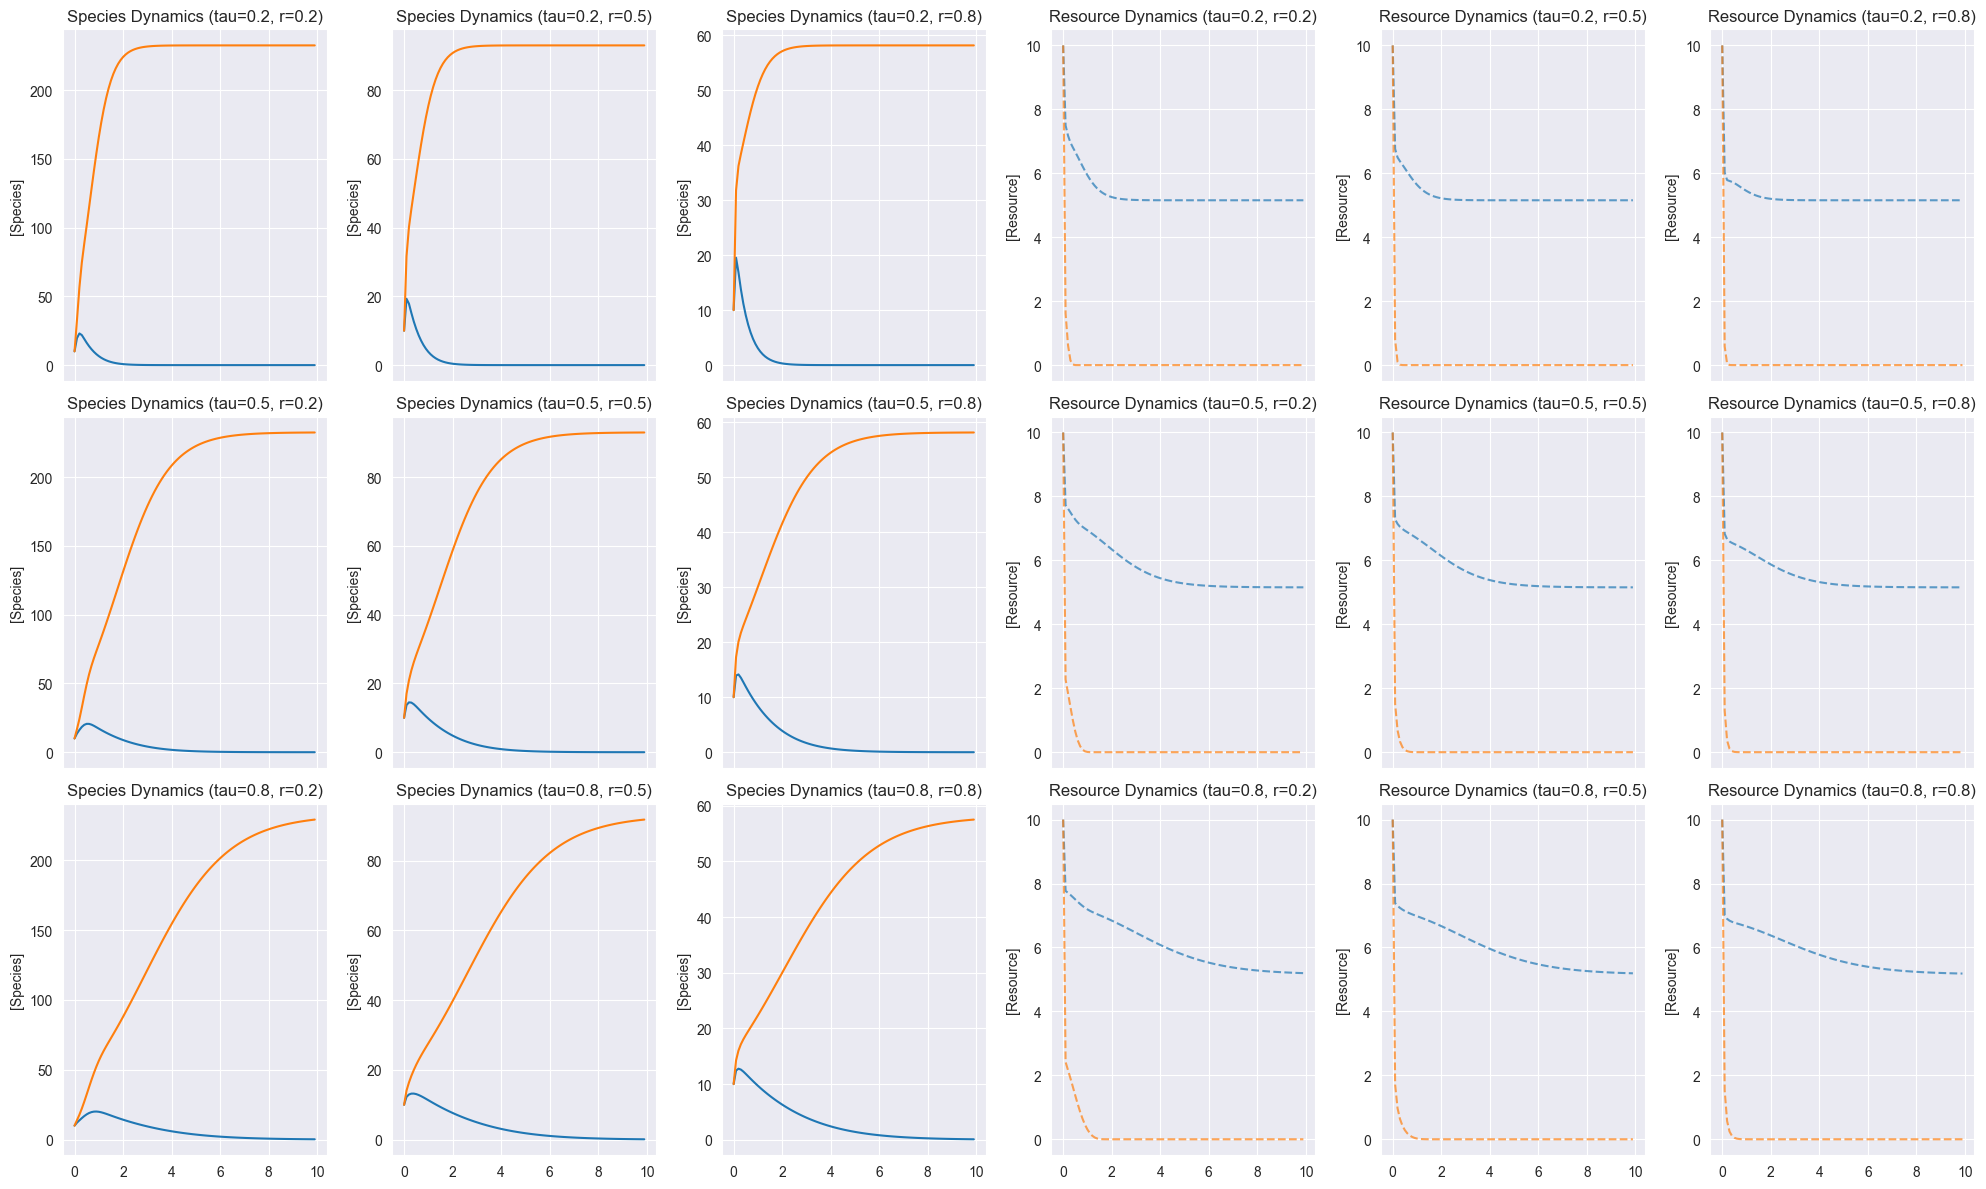

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mimic.model_simulate.sim_CRM import sim_CRM

# Set all seeds for reproducibility
np.random.seed(1234)

# Define ranges for w and m
tau_values = [0.2, 0.5, 0.8]  # Different resource qualities
r_values = [0.2, 0.5, 0.8]  # Different mortality rates

# Simulation parameters
num_species = 2
num_resources = 2
times = np.arange(0, 10, 0.1)

# Initial conditions
init_species = 10 * np.ones(num_species + num_resources)

# Set up the grid for plotting: two 3x3 grids side-by-side
fig, axes = plt.subplots(3, 6, figsize=(20, 12), sharex=True)

# Fixed parameters (other than w and m)
#tau = np.random.uniform(0.1, 1.0, num_species)
c = np.random.uniform(0.1, 1.0, (num_species, num_resources))
#r = np.random.uniform(0.1, 1.0, num_resources)
K = np.random.uniform(1.0, 10.0, num_resources)
w = np.random.uniform(0.1, 1.0, num_resources)
m = np.random.uniform(0.1, 1.0, num_resources)

tau = np.array([tau] * num_species)
r = np.array([r] * num_resources)

# Loop over different values of w and m
for i, tau in enumerate(tau_values):
    for j, r in enumerate(r_values):
        # Instantiate the simulator with current parameters
        simulator = sim_CRM(num_species=num_species, num_resources=num_resources)
        simulator.set_parameters(
            num_species=num_species,
            num_resources=num_resources,
            tau=tau,
            w=w,
            c=c,
            m=m,
            r=r,
            K=K
        )
        
        # Run the simulation
        yobs, sobs = simulator.simulate(times, init_species)
        
        # Determine row and column positions in the 3x3 grids
        row, col = i, j
        
        # Plot the species dynamics on the left grid (columns 0-2)
        for species_idx in range(yobs.shape[1]):
            axes[row, col].plot(times, yobs[:, species_idx], label=f'Species {species_idx + 1}')
        axes[row, col].set_title(f'Species Dynamics (tau={tau}, r={r})')
        axes[row, col].set_ylabel('[Species]')
        
        # Plot the resource dynamics on the right grid (columns 3-5)
        for resource_idx in range(sobs.shape[1]):
            axes[row, col + 3].plot(times, sobs[:, resource_idx], linestyle='--', label=f'Resource {resource_idx + 1}', alpha=0.7)
        axes[row, col + 3].set_title(f'Resource Dynamics (tau={tau}, r={r})')
        axes[row, col + 3].set_ylabel('[Resource]')




# Adjust layout for readability
plt.tight_layout()
plt.show()


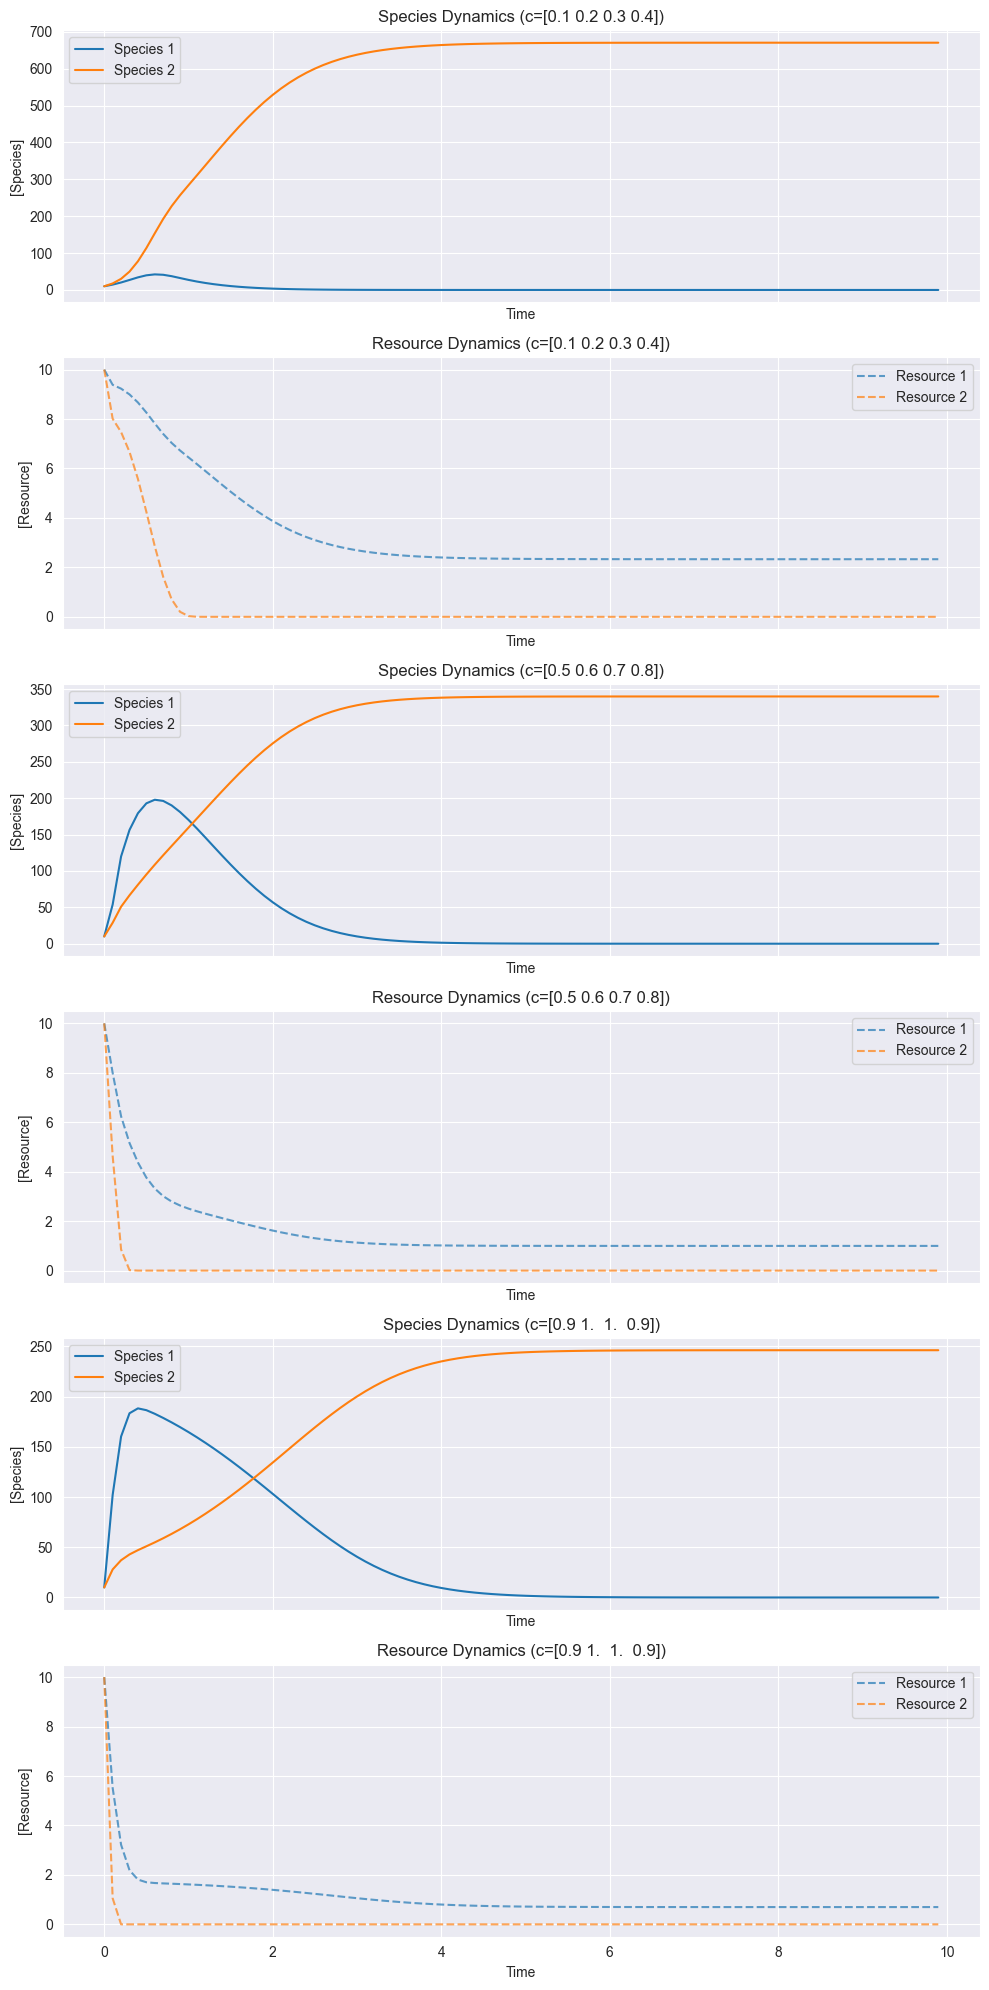

In [6]:
from mimic.model_simulate.sim_CRM import sim_CRM

set_all_seeds(1234)


# Simulation parameters
num_species = 2
num_resources = 2
times = np.arange(0, 10, 0.1)

# Initial conditions
init_species = 10 * np.ones(num_species + num_resources)


c_matrices = [
    np.array([[0.1, 0.2], [0.3, 0.4]]),  # Low interaction strengths
    np.array([[0.5, 0.6], [0.7, 0.8]]),  # Medium interaction strengths
    np.array([[0.9, 1.0], [1.0, 0.9]])   # High interaction strengths
]

# Set up the grid for plotting: 2 rows per parameter combination of `c`
fig, axes = plt.subplots(2 * len(c_matrices), 1, figsize=(10, 20), sharex=True)

# Other fixed parameters (you can modify these if needed)
tau = np.random.uniform(0.1, 1.0, num_species)
w = np.random.uniform(0.1, 1.0, num_resources)
m = np.random.uniform(0.1, 1.0, num_species)
r = np.random.uniform(0.1, 1.0, num_resources)
K = np.random.uniform(1.0, 10.0, num_resources)

# Loop over each interaction matrix in `c_matrices`
for idx, c in enumerate(c_matrices):
    # Instantiate simulator with current parameters
    simulator = sim_CRM(num_species=num_species, num_resources=num_resources)
    simulator.set_parameters(
        num_species=num_species,
        num_resources=num_resources,
        tau=tau,
        w=w,
        c=c,
        m=m,
        r=r,
        K=K
    )
    
    # Run the simulation
    yobs, sobs = simulator.simulate(times, init_species)
    
    # Plot the species dynamics on the top subplot for this `c`
    for species_idx in range(yobs.shape[1]):
        axes[2*idx].plot(times, yobs[:, species_idx], label=f'Species {species_idx + 1}')
    axes[2*idx].set_title(f'Species Dynamics (c={c.flatten()})')
    axes[2*idx].set_xlabel('Time')
    axes[2*idx].set_ylabel('[Species]')
    
    # Plot the resource dynamics on the bottom subplot for this `c`
    for resource_idx in range(sobs.shape[1]):
        axes[2*idx + 1].plot(times, sobs[:, resource_idx], linestyle='--', label=f'Resource {resource_idx + 1}', alpha=0.7)
    axes[2*idx + 1].set_title(f'Resource Dynamics (c={c.flatten()})')
    axes[2*idx + 1].set_xlabel('Time')
    axes[2*idx + 1].set_ylabel('[Resource]')

    # Add legends to the first plot in each row for clarity
    axes[2*idx].legend()
    axes[2*idx + 1].legend()

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [ ]:
## Example SIR model

In [ ]:
def SIR(y, t, p):
    ds = -p[0] * y[0] * y[1]
    di = p[0] * y[0] * y[1] - p[1] * y[1]
    return [ds, di]


times = np.arange(0, 5, 0.25)

beta, gamma = 4, 1.0
# Create true curves
y = odeint(SIR, t=times, y0=[0.99, 0.01], args=((beta, gamma),), rtol=1e-8)
# Observational model.  Lognormal likelihood isn't appropriate, but we'll do it anyway
yobs = np.random.lognormal(mean=np.log(y[1::]), sigma=[0.2, 0.3])

plt.plot(times[1::], yobs, marker="o", linestyle="none")
plt.plot(times, y[:, 0], color="C0", alpha=0.5, label=f"$S(t)$")
plt.plot(times, y[:, 1], color="C1", alpha=0.5, label=f"$I(t)$")
plt.legend()
plt.show()

In [ ]:
sir_model = DifferentialEquation(
    func=SIR,
    times=np.arange(0.25, 5, 0.25),
    n_states=2,
    n_theta=2,
    t0=0,
)

with pm.Model() as model4:
    sigma = pm.HalfCauchy("sigma", 1, shape=2)

    # R0 is bounded below by 1 because we see an epidemic has occurred
    R0 = pm.TruncatedNormal("R0", mu=2, sigma=3, lower=1)
    lam = pm.Lognormal("lambda", pm.math.log(2), 2)
    beta = pm.Deterministic("beta", lam * R0)

    sir_curves = sir_model(y0=[0.99, 0.01], theta=[beta, lam])

    Y = pm.Lognormal("Y", mu=pm.math.log(sir_curves), sigma=sigma, observed=yobs)

    data = pm.sample(draws = 20, tune=20, chains = 2, cores=2)

In [ ]:
az.plot_posterior(data)